In [1]:
#Importing Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
import random
import matplotlib.pyplot as plt
import csv

In [73]:
df1 = pd.read_csv("C:\\Users\\sophi\\VS Code Projects\\LiB-SOH-prediction\\Nasa Battery Data\\Battery 5\\Discharge cycle\\Padded and Resampled\\NoisyInputData2.csv")
df2 = pd.read_csv("C:\\Users\\sophi\\VS Code Projects\\LiB-SOH-prediction\\Nasa Battery Data\\Battery 5\\Discharge cycle\\Padded and Resampled\\NoisyInputTempData3.csv")


In [74]:
df1.reset_index(inplace=True, drop=True)
df2.reset_index(inplace=True, drop=True)
df = pd.concat([df1,df2],axis=1,join='inner')
df

,1,2,3,4,5,6,7,8,9,10,...,213,214,215,216,217,218,219,220,221,222
0,4.191120,3.963294,3.934353,3.913981,3.892256,3.878959,3.867248,3.853337,3.843842,3.834813,...,36.722549,36.861855,37.022599,37.181073,37.365012,37.627555,37.840427,38.057890,38.303031,38.476446
1,4.215261,3.968011,3.887869,3.865122,3.843037,3.885004,3.839707,3.821559,3.851694,3.870356,...,36.699067,36.818276,37.015182,37.145219,37.362412,37.666726,37.796207,38.079334,38.302868,38.445339
2,4.189327,3.968040,3.940054,3.920207,3.899267,3.886131,3.874399,3.860394,3.850762,3.841739,...,36.893049,37.041780,37.193637,37.369295,37.543937,37.748089,37.953532,38.262450,38.523283,38.523283
3,4.237146,3.919137,3.915518,3.969901,3.859206,3.893201,3.916531,3.905008,3.857741,3.835792,...,36.927869,37.048669,37.217194,37.350016,37.503624,37.715347,37.964534,38.240753,38.525274,38.510168
4,4.187692,3.969083,3.941673,3.922065,3.901177,3.888363,3.876732,3.863025,3.853106,3.844131,...,36.858318,37.021134,37.181297,37.358749,37.533951,37.733590,37.954093,38.184174,38.446801,38.542891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,4.100669,3.896127,3.823492,3.800943,3.799121,3.817933,3.777732,3.825321,3.738418,3.766609,...,40.664100,40.619576,40.683036,40.690040,40.671666,40.666254,40.673942,40.634114,40.693150,40.661946
306,4.069058,3.910524,3.875702,3.850198,3.830213,3.811618,3.796092,3.784147,3.772762,3.761168,...,40.649221,40.649221,40.649221,40.649221,40.649221,40.649221,40.649221,40.649221,40.649221,40.649221
307,4.077345,3.894806,3.895636,3.887775,3.817913,3.858464,3.797755,3.816261,3.773938,3.769551,...,40.663099,40.678694,40.676281,40.673836,40.621061,40.697968,40.656578,40.636833,40.673875,40.663925
308,4.086227,3.927840,3.892792,3.867122,3.846694,3.827290,3.810949,3.798712,3.787293,3.776102,...,40.406072,40.406072,40.406072,40.406072,40.406072,40.406072,40.406072,40.406072,40.406072,40.406072


In [75]:
trainX = df.drop(columns=["y"])
trainy = df['y'] 
trainX = trainX.to_numpy()
trainy = trainy.to_numpy()
rows, columns = trainX.shape
trainy = trainy.reshape(rows,1)
#Normalizing
scaler = MinMaxScaler()
Xn_train = scaler.fit_transform(trainX)
yn_train = scaler.fit_transform(trainy)


In [77]:
#Reshaping
Xn_train = Xn_train.reshape(rows, 1, columns)

Alltrain = False

if not Alltrain:
    X_train, X_test, y_train, y_test = train_test_split(Xn_train,yn_train , test_size=0.10)
else:
    X_train = Xn_train
    X_test = Xn_train
    y_train = yn_train
    y_test = yn_train


test_rows,foo, test_columns = X_test.shape
train_rows , foo , train_col = X_train.shape

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(1,train_col), return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(LSTM(100, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(LSTM(64, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(yn_train.shape[1]))

tf.keras.optimizers.Adam(
    learning_rate=0.001,
    name='Adam')

model.compile(optimizer='Adam', loss='mse')
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 1, 100)            129200    
                                                                 
 dropout_19 (Dropout)        (None, 1, 100)            0         
                                                                 
 dense_18 (Dense)            (None, 1, 64)             6464      
                                                                 
 lstm_20 (LSTM)              (None, 1, 100)            66000     
                                                                 
 dropout_20 (Dropout)        (None, 1, 100)            0         
                                                                 
 dense_19 (Dense)            (None, 1, 64)             6464      
                                                                 
 lstm_21 (LSTM)              (None, 64)              

In [115]:
#fitting the model to X_train and y_train dataset, and 100 epochs and saving it into history
history = model.fit(X_train,y_train, epochs=100,batch_size=5)

Epoch 1/100
56/56 [==============================] - 10s 8ms/step - loss: 0.0630
Epoch 2/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 3/100
56/56 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 4/100
56/56 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 5/100
56/56 [==============================] - 1s 10ms/step - loss: 0.0054
Epoch 6/100
56/56 [==============================] - 1s 18ms/step - loss: 0.0042
Epoch 7/100
56/56 [==============================] - 1s 21ms/step - loss: 0.0046
Epoch 8/100
56/56 [==============================] - 1s 13ms/step - loss: 0.0031
Epoch 9/100
56/56 [==============================] - 1s 16ms/step - loss: 0.0033
Epoch 10/100
56/56 [==============================] - 2s 27ms/step - loss: 0.0034
Epoch 11/100
56/56 [==============================] - 1s 13ms/step - loss: 0.0032
Epoch 12/100
56/56 [==============================] - 1s 10ms/step - loss: 0.0038
Epoch 13/100
56/56 [========

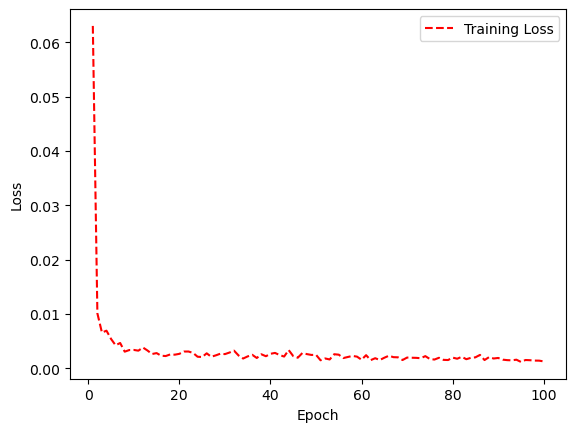

In [116]:
# Using function to get loss history
training_loss = history.history['loss']

# Code for counting the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [117]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(test_rows,1)


1/1 [==============================] - 2s 2s/step


In [118]:
yd_pred = scaler.inverse_transform(y_pred)
yy_test = scaler.inverse_transform(y_test)
y_error = yy_test - yd_pred
df5 = pd.DataFrame(yy_test)
df6 = pd.DataFrame(yd_pred)
df7 = pd.DataFrame(y_error)
DFF = pd.concat([df5,df6,df7],axis=1,join='inner')
DFF.columns = ["Test Data","Prediction Data","Error"]

In [119]:
from sklearn.metrics import mean_absolute_error
print('MAE for y: %.3f' % mean_absolute_error(yy_test, yd_pred))

MAE for y: 0.010


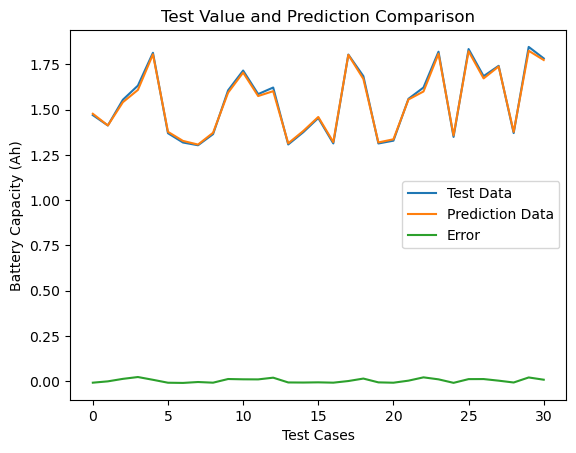

In [121]:
DFF.plot(use_index=True,legend=True,title="Test Value and Prediction Comparison", xlabel="Test Cases", ylabel="Battery Capacity (Ah)")
plt.show()

In [32]:
DFF.to_csv("C:\\Users\\sophi\\VS Code Projects\\LiB-SOH-prediction\\Nasa Battery Data\\Battery 5\\Predictions1.csv")

In [22]:
#Data plotting
df3 = pd.read_csv("C:\\Users\\sophi\\VS Code Projects\\LiB-SOH-prediction\\Nasa Battery Data\\Battery 5\\Discharge cycle\\Headers\\B0005 cycle 2 data with headers.csv")

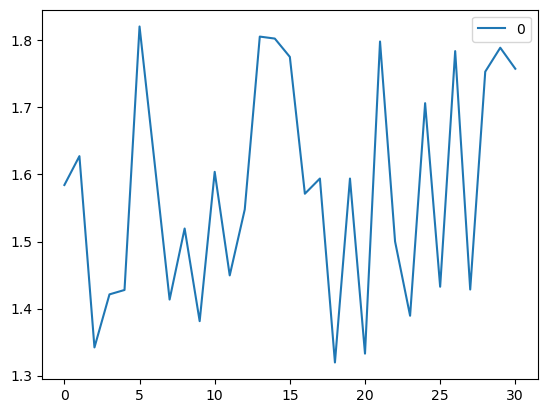

In [31]:
df3.reset_index(inplace=True, drop=True)
df4 = df3["Voltages"]
#df4.plot()
df6.plot()

plt.show()

In [ ]:
x_axis 
plt.scatter(y_test)
plt.xlabel('Time step')
plt.ylabel('Capacity')